# Federal Budget

Generate visualizations to look at the federal budget over time

Import the modules needed.
Read in the budget data file and start to explore it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.plotly as py
plotly.tools.set_credentials_file(username='scatanoso', api_key='aae14Ui0d85GBwgkUcPY')

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import ipywidgets
import os

os.chdir('c:/Users/sue/Stockton MSDSSA/Data Visualization in Users/Federal Budget')


budget = pd.read_csv('BUDGET-2019-BudgetAuthority.csv')
budget.head()

,Agency Code,Agency Name,Bureau Code,Bureau Name,Account Code,Account Name,Treasury Agency Code,Subfunction Code,Subfunction Title,BEA Category,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
1,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,0
2,1,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
3,1,Legislative Branch,5,Senate,0.0,Senate,0.0,801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,0
4,1,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,801,Legislative functions,Mandatory,...,"24,000","24,000","24,000","24,000","24,000","24,000","24,000","24,000","24,000","24,000"


# From reading the information on the website where the data came from 
# (https://www.govinfo.gov/app/details/BUDGET-2019-DB/context):

 The data is compiled by the Office of Management and Budget and the Office of the Treasury.
 
 The years are the fiscal years (FY).  From 1965 - 1976, the FY ran from July 1 to June 30.  There is a transition
 quarter (TQ) for July 1, 1977 - September 30, 1977 when the fiscal year changed to October 1 - September 30.
 The data is historical prior to 2018.  It is budget estimates for 2018 onward.  This was prepared for FY 2019
 which was compiled in FY 2018 - that is why there are estimates for 2018.
 The budget figures are in thousands of dollars (000's)

In [2]:
budget.dtypes

Agency Code               int64
Agency Name              object
Bureau Code               int64
Bureau Name              object
Account Code            float64
Account Name             object
Treasury Agency Code    float64
Subfunction Code          int64
Subfunction Title        object
BEA Category             object
On- or Off- Budget       object
1976                     object
TQ                       object
1977                     object
1978                     object
1979                     object
1980                     object
1981                     object
1982                     object
1983                     object
1984                     object
1985                     object
1986                     object
1987                     object
1988                     object
1989                     object
1990                     object
1991                     object
1992                     object
1993                     object
1994                     object
1995    

In [3]:
budget.describe(include=['object'])

,Agency Name,Bureau Name,Account Name,Subfunction Title,BEA Category,On- or Off- Budget,1976,TQ,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,...,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
unique,224,486,3350,84,3,2,755,673,769,804,...,823,841,858,868,875,812,788,777,796,775
top,Department of the Interior,Department of the Interior,Salaries and Expenses,Department of Defense-Military,Mandatory,On-budget,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,418,205,154,322,2133,4500,3744,3838,3732,3704,...,2702,2721,2697,2671,2673,2807,2880,2902,2904,2907


There are many unique agencies (224), bureaus (486) and subfunction titles (84) to visualize all of them in one graphic - even with allowing the user to select some.  Bureaus are subsets of the agencies.  I want to look at funding by Agency.
 
 The years for the budget are from 1976 through 2023, but I'm only going to let the user select 1977 onward because of the change in the fiscal year.  This way the user is comparing apples to apples.

Here is the official list of the contents of the columns from the pdf explaining the data fields:
Field # Field name           Description                                        Valid values
1       Agency code          3-digit numerical code for Cabinet department or
                             independent agency
                                                                                See Table 1 (below) “Listing
                                                                                of Agency and Bureau Codes”
2       Agency name          Agency name from Table 1 (maximum: 89 characters)  See Table 1
3       Bureau code          2-digit numerical code for the bureau within the
                             Cabinet department or independent agency           See Table 1
4       Bureau name          Bureau name from Table 1 (maximum: 89 characters)  See Table 1
5       Account code         4-digit code (outlays) or 6-digit code (offsetting
                             receipts)                                          Any 4- or 6- digit number
6       Account name         Account name (maximum: 160 characters)             Any text
7       Treasury Agency code 2-digit numerical code for the agency, assigned 
                             by the Treasury Department                         See Treasury publication
                                                                                cited above
8       Subfunction code     3-digit numerical code for the subfunction         See Table 2, “Listing of
                                                                                Functions and Subfunctions”
9       Subfunction title    Subfunction title (maximum: 72 characters)         See Table 2
10      BEA category         Budget Enforcement Act category                    “Mandatory,” “Discretionary,” 
                                                                                or “Net interest”
11      On- and offbudget indicator
                             Social Security trust funds and the Postal Service
                             are off-budget, all other accounts are on-budget   “On-budget” or “Off-budget”
12      1976 value           Actual amounts, in thousands of dollars, for FY 1976
                                                                                Budget authority is usually 
                                                                                shown as a positive value.  
                                                                                Offsetting receipts are usually 
                                                                                negative values.              
13      TQ value             Actual amounts, in thousands of dollars, for the
                             “transitional quarter” (see note above)            (same as above)
14-54   1977 – 2017 values   Actual amounts, in thousands of dollars, for each
                             fiscal year                                        (same as above)
55-60   2018 – 2023 values   Estimated amounts, in thousands of dollars, for 
                             FY 2018 through FY 2023                            (same as above) 
                             
https://www.govinfo.gov/content/pkg/BUDGET-2019-DB/pdf/BUDGET-2019-DB-4.pdf


# Rename columns so it is easier to work with them to come up with a better way to "see" the data.

# Rename the columns to eliminate the spaces.


In [4]:
budget.columns = budget.columns.str.replace(' ', '_')
budget.columns

Index(['Agency_Code', 'Agency_Name', 'Bureau_Code', 'Bureau_Name',
       'Account_Code', 'Account_Name', 'Treasury_Agency_Code',
       'Subfunction_Code', 'Subfunction_Title', 'BEA_Category',
       'On-_or_Off-_Budget', '1976', 'TQ', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

# Change the name of the On-_or_Off-_Budget column

In [5]:
budget.rename(columns = {'On-_or_Off-_Budget':'On_or_Off_Budget'}, inplace=True)
budget.columns

Index(['Agency_Code', 'Agency_Name', 'Bureau_Code', 'Bureau_Name',
       'Account_Code', 'Account_Name', 'Treasury_Agency_Code',
       'Subfunction_Code', 'Subfunction_Title', 'BEA_Category',
       'On_or_Off_Budget', '1976', 'TQ', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

# Remove the commas in the year columns so that the data can be converted to a numeric type

In [6]:
cols = ['1976', 'TQ', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023']
budget[cols] = budget[cols].replace({',':''}, regex=True)
budget.head()

,Agency_Code,Agency_Name,Bureau_Code,Bureau_Name,Account_Code,Account_Name,Treasury_Agency_Code,Subfunction_Code,Subfunction_Title,BEA_Category,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
1,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,0
2,1,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
3,1,Legislative Branch,5,Senate,0.0,Senate,0.0,801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,0
4,1,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,801,Legislative functions,Mandatory,...,24000,24000,24000,24000,24000,24000,24000,24000,24000,24000


# Change the numbers to numbers instead of objects. 

In [7]:
budget[cols] = budget[cols].apply(pd.to_numeric)
budget.dtypes

Agency_Code               int64
Agency_Name              object
Bureau_Code               int64
Bureau_Name              object
Account_Code            float64
Account_Name             object
Treasury_Agency_Code    float64
Subfunction_Code          int64
Subfunction_Title        object
BEA_Category             object
On_or_Off_Budget         object
1976                      int64
TQ                        int64
1977                      int64
1978                      int64
1979                      int64
1980                      int64
1981                      int64
1982                      int64
1983                      int64
1984                      int64
1985                      int64
1986                      int64
1987                      int64
1988                      int64
1989                      int64
1990                      int64
1991                      int64
1992                      int64
1993                      int64
1994                      int64
1995    

# All Agencies are 3 digit numbers.
# Check to make sure all agencies are filled in

In [8]:
budget['Agency_Code'].isnull().values.any()

False

In [9]:
budget['Agency_Code'].nunique()           

225

# Expected 224 based on Agency_Name.  From looking the reference documents with the data, Agency Codes 016 and 017 are the same, so combine them.  Just use 16.

In [10]:
budget['Agency_Code'].replace([17],[16], inplace=True)             
budget['Agency_Code'].nunique()    

224

In [11]:
budget['Agency_Name'].isnull().values.any()

False

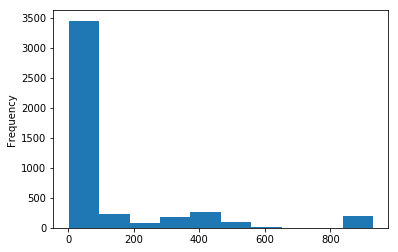

In [12]:
budget['Agency_Code'].plot.hist()
plt.show()

# Makes sense looking at the table of Agencies in the documentation - most codes of major departments are less than 200.  Almost all agencies with codes over 200 have only one bureau associated with them so they would show up fewer times in the data.

# Check to make sure all subfunctions are filled in

In [13]:
budget['Subfunction_Code'].isnull().values.any()

False

In [14]:
budget['Subfunction_Code'].nunique()                              # Expect 84

84

In [15]:
budget['Subfunction_Title'].isnull().values.any()

False

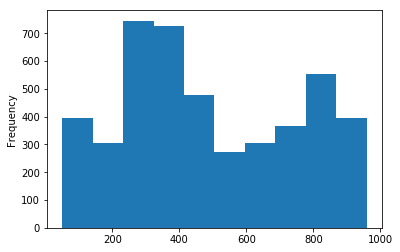

In [16]:
budget['Subfunction_Code'].plot.hist()
plt.show()

Can see that some subfunctions are more frequent than others - but all appear frequently.

# How can I visualize the data in a meaningful way to show the flow from type of money (Mandatory, Discretionary or Net Interest) to Agency to Department (Subfunction)?  

Going to use a Sankey diagram.
To generate a Sankey diagram, I need a list of Targets, Sources and Values.  
Values will be the budget dollars for the year the Sankey diagram will be generated.
The data will need to be summarized to get targets and sources.  
The targets and sources need to be unique so the flow can be tracked from 1 to 2 to 3 to ...
Setting up the node numbers to be the node layer plus the current code for that element.  For BEA_Category (Mandatory, Discretionary and Net Interest), there are no codes so they are being assigned.

Node 1 will be BEA_Category.  Assign 1, 2 or 3 to the Categories



In [17]:
BEA_Code =[]
for row in budget.BEA_Category:               # Iterate through budget dataframe populating BEA_Code with the appropriate codes 
    if row in ['Mandatory']:
        BEA_Code.append(1)
    elif row in ['Discretionary']:
        BEA_Code.append(2)
    else:
        BEA_Code.append('3')

        
budget['BEA_Code'] = BEA_Code                # Add a new column to the budget dataframe that has all of the Budget Codes
budget['BEA_Code'] = budget['BEA_Code'].apply(pd.to_numeric)

budget.head()

,Agency_Code,Agency_Name,Bureau_Code,Bureau_Name,Account_Code,Account_Name,Treasury_Agency_Code,Subfunction_Code,Subfunction_Title,BEA_Category,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,BEA_Code
0,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
1,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,3
2,1,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
3,1,Legislative Branch,5,Senate,0.0,Senate,0.0,801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,2
4,1,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,801,Legislative functions,Mandatory,...,24000,24000,24000,24000,24000,24000,24000,24000,24000,1


# Check to make sure there are still 224 unique agencies, 84 unique subfunctions and 3 unique BEA's

In [18]:
budget.describe(include=['object'])

,Agency_Name,Bureau_Name,Account_Name,Subfunction_Title,BEA_Category,On_or_Off_Budget
count,4543,4543,4543,4543,4543,4543
unique,224,486,3350,84,3,2
top,Department of the Interior,Department of the Interior,Salaries and Expenses,Department of Defense-Military,Mandatory,On-budget
freq,418,205,154,322,2133,4500


# Node 2 will be Agency.  Use Agency_Code + 1000 (since these are all up to 3 digit numbers, 1000 added to them will make them unique from the BEA numbers)

In [19]:
def new_code(Agency_Code):
    Agency_Code = Agency_Code + 1000
    return Agency_Code
budget['Agency_Code'] = budget.Agency_Code.apply(new_code)

budget.head()

,Agency_Code,Agency_Name,Bureau_Code,Bureau_Name,Account_Code,Account_Name,Treasury_Agency_Code,Subfunction_Code,Subfunction_Title,BEA_Category,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,BEA_Code
0,1001,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
1,1001,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,3
2,1001,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
3,1001,Legislative Branch,5,Senate,0.0,Senate,0.0,801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,2
4,1001,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,801,Legislative functions,Mandatory,...,24000,24000,24000,24000,24000,24000,24000,24000,24000,1


# Check to make sure there are still 224 unique agencies, 84 unique subfunctions and 3 unique BEA's

In [20]:
budget.describe(include=['object'])

,Agency_Name,Bureau_Name,Account_Name,Subfunction_Title,BEA_Category,On_or_Off_Budget
count,4543,4543,4543,4543,4543,4543
unique,224,486,3350,84,3,2
top,Department of the Interior,Department of the Interior,Salaries and Expenses,Department of Defense-Military,Mandatory,On-budget
freq,418,205,154,322,2133,4500


# Node 3 will be Subfunction_Title.  Use Subfunction_Code + 2000 (since these are all up to 3 digit numbers, 2000 added to them will make them unique from the Agency numbers)

In [21]:
def new_code(Subfunction_Code):
    Subfunction_Code = Subfunction_Code + 2000
    return Subfunction_Code
budget['Subfunction_Code'] = budget.Subfunction_Code.apply(new_code)

budget.head()

,Agency_Code,Agency_Name,Bureau_Code,Bureau_Name,Account_Code,Account_Name,Treasury_Agency_Code,Subfunction_Code,Subfunction_Title,BEA_Category,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,BEA_Code
0,1001,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,2803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
1,1001,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,2908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,3
2,1001,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,2803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,1
3,1001,Legislative Branch,5,Senate,0.0,Senate,0.0,2801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,2
4,1001,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,2801,Legislative functions,Mandatory,...,24000,24000,24000,24000,24000,24000,24000,24000,24000,1


# Check to make sure there are still 224 unique agencies, 84 unique subfunctions and 3 unique BEA's

In [22]:
budget.describe(include=['object'])

,Agency_Name,Bureau_Name,Account_Name,Subfunction_Title,BEA_Category,On_or_Off_Budget
count,4543,4543,4543,4543,4543,4543
unique,224,486,3350,84,3,2
top,Department of the Interior,Department of the Interior,Salaries and Expenses,Department of Defense-Military,Mandatory,On-budget
freq,418,205,154,322,2133,4500


# Consolidate data into unique combinations of BEA_Code flowing into Agency_Code

In [57]:
BEAtoAgency = budget.groupby(['BEA_Code', 'Agency_Code'])[['1976', 'TQ', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
                                  '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                  '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].sum().reset_index()
BEAtoAgency.head()


,BEA_Code,Agency_Code,1976,TQ,1977,1978,1979,1980,1981,1982,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1001,2105,263,1977,9373,17554,21637,27086,35719,...,130000,139000,133000,156000,141000,142000,164000,170000,178000,175000
1,1,1002,69,-32,2208,6364,7029,8618,9350,10930,...,773000,714000,823000,841000,869000,901000,974000,1024000,1063000,1083000
2,1,1005,16163067,3207885,16594924,20877882,31117260,32865305,39905579,50444501,...,133257000,117447000,143008000,111391000,119889000,103053000,98684000,100688000,101925000,103363000
3,1,1006,-5111,-857,-6054,-5251,-5981,-8806,-7851,-6424,...,1830000,5233000,1080000,157000,245000,249000,239000,239000,239000,239000
4,1,1007,-236373,-39650,-240123,-156933,-456559,-694529,-497357,-716815,...,14267000,10419000,15425000,20289000,6797000,9069000,9399000,9280000,9402000,9148000


# Test randomly to see if the sums are the same in the budget dataframe and the Sankey dataframe to know the data was manipulated correctly

In [58]:
budget['1976'].sum()-BEAtoAgency['1976'].sum()             # Expect 0

0

In [59]:
budget['1986'].sum()-BEAtoAgency['1986'].sum()             # Expect 0

0

# There are 351 BEA to Agency relationships.   224 unique Agencies matching up with 3 BEA's.  Would expect a number between 224 and 3 x 224.

In [60]:
BEAtoAgency.describe()

,BEA_Code,Agency_Code,1976,TQ,1977,1978,1979,1980,1981,1982,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,351.000000,351.000000,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,...,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02
mean,1.769231,1338.897436,1.199061e+06,2.752416e+05,1.334615e+06,1.437508e+06,1.592106e+06,1.909009e+06,2.109116e+06,2.297783e+06,...,1.031050e+07,1.074848e+07,1.131889e+07,1.183443e+07,1.214927e+07,1.302342e+07,1.304160e+07,1.354202e+07,1.427701e+07,1.483757e+07
std,0.624060,186.914437,7.427721e+06,1.836548e+06,8.473482e+06,9.125783e+06,1.006233e+07,1.156979e+07,1.398794e+07,1.618407e+07,...,7.847895e+07,8.159414e+07,8.586486e+07,8.802264e+07,9.281000e+07,9.848720e+07,1.008661e+08,1.055411e+08,1.129083e+08,1.179377e+08
min,1.000000,1001.000000,-1.438630e+07,-4.206245e+06,-1.487882e+07,-1.571992e+07,-1.747634e+07,-1.994246e+07,-2.804116e+07,-2.609892e+07,...,-1.581140e+08,-1.417910e+08,-1.461110e+08,-1.470540e+08,-1.438320e+08,-1.437770e+08,-1.459390e+08,-1.488740e+08,-1.519440e+08,-1.537390e+08
25%,1.000000,1302.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,1382.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,1457.000000,5.283000e+03,1.050000e+03,4.679000e+03,7.380000e+03,8.701500e+03,1.286200e+04,1.383500e+04,1.237650e+04,...,8.150000e+04,8.150000e+04,8.600000e+04,8.300000e+04,6.900000e+04,4.400000e+04,3.800000e+04,3.800000e+04,3.800000e+04,3.500000e+04
max,3.000000,1930.000000,9.573951e+07,2.296468e+07,1.081461e+08,1.146879e+08,1.240520e+08,1.413456e+08,1.765976e+08,2.122032e+08,...,9.023040e+08,9.617960e+08,1.033337e+09,1.055751e+09,1.110365e+09,1.158978e+09,1.167598e+09,1.234567e+09,1.310933e+09,1.382505e+09


# Consolidate data into unique combinations of Agency_Code flowing into Subfunction_Code

In [61]:
AgencytoSubfunction = budget.groupby(['BEA_Code','Agency_Code', 'Subfunction_Code'])[['1976', 'TQ', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
                                  '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                  '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].sum().reset_index()
AgencytoSubfunction.head()

,BEA_Code,Agency_Code,Subfunction_Code,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1001,2153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,2154,0,0,0,0,0,0,0,...,0,0,0,0,-1000,-1000,-1000,-1000,-1000,-1000
2,1,1001,2376,0,0,0,6465,15195,18461,24981,...,5000,4000,4000,4000,6000,6000,6000,7000,7000,7000
3,1,1001,2503,2332,396,2322,3186,2970,3375,2580,...,-2000,9000,3000,35000,6000,6000,9000,9000,9000,10000
4,1,1001,2551,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test randomly to see if the sums are the same in the budget dataframe and the Sankey dataframe to know the data was manipulated correctly

In [62]:
budget['1976'].sum()-AgencytoSubfunction['1976'].sum()               # Expect 0

0

In [63]:
budget['TQ'].sum()-AgencytoSubfunction['TQ'].sum()                  # Expect 0

0

# There are 583 Agency to Subfunction relationships, but when carrying over BEA also that increases to 770 - so 187 have split relationships with BEA.   224 unique Agencies matching up with 84 Subfunctions.  I thought this number would be a higher number - but there were a lot of 0's.

In [64]:
AgencytoSubfunction.describe()

,BEA_Code,Agency_Code,Subfunction_Code,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,770.000000,770.000000,770.000000,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,...,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02,7.700000e+02
mean,1.614286,1211.662338,2529.412987,5.465848e+05,1.254673e+05,6.083765e+05,6.552796e+05,7.257520e+05,8.702107e+05,9.614283e+05,...,4.699981e+06,4.899631e+06,5.159652e+06,5.394655e+06,5.538175e+06,5.936648e+06,5.944938e+06,6.173052e+06,6.508091e+06,6.763621e+06
std,0.588625,228.250701,239.731918,4.774678e+06,1.178577e+06,5.461311e+06,5.899261e+06,6.505468e+06,7.538034e+06,9.159003e+06,...,4.678742e+07,4.783629e+07,5.011241e+07,5.169987e+07,5.470380e+07,5.837234e+07,6.079185e+07,6.410333e+07,6.847219e+07,7.183776e+07
min,1.000000,1001.000000,2051.000000,-1.076086e+07,-2.646126e+06,-1.152807e+07,-1.240137e+07,-1.309496e+07,-1.463758e+07,-1.647318e+07,...,-1.002660e+08,-9.596800e+07,-9.057500e+07,-8.651200e+07,-8.371300e+07,-8.173400e+07,-7.962300e+07,-7.755900e+07,-7.788700e+07,-8.193800e+07
25%,1.000000,1015.000000,2372.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,1100.000000,2503.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,1399.250000,2754.000000,5.242250e+03,4.875000e+02,5.889000e+03,6.439750e+03,8.726750e+03,1.187200e+04,1.213975e+04,...,9.125000e+04,9.075000e+04,9.750000e+04,8.750000e+04,7.675000e+04,5.475000e+04,5.150000e+04,4.500000e+04,4.675000e+04,4.675000e+04
max,3.000000,1930.000000,2959.000000,9.573951e+07,2.296468e+07,1.081461e+08,1.146879e+08,1.240520e+08,1.413456e+08,1.765976e+08,...,8.493670e+08,8.865840e+08,9.144050e+08,9.404390e+08,9.913630e+08,1.051829e+09,1.113416e+09,1.178593e+09,1.248823e+09,1.323064e+09


# Create a new dataframe that consists of columns for sources (flow from), targets (flow to), and values (budget amounts).
# First re-name columns

In [65]:
BEAtoAgency.rename(columns = {'BEA_Code':'Source'}, inplace=True)
BEAtoAgency.rename(columns = {'Agency_Code':'Target'}, inplace=True)
BEAtoAgency.head()

,Source,Target,1976,TQ,1977,1978,1979,1980,1981,1982,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1001,2105,263,1977,9373,17554,21637,27086,35719,...,130000,139000,133000,156000,141000,142000,164000,170000,178000,175000
1,1,1002,69,-32,2208,6364,7029,8618,9350,10930,...,773000,714000,823000,841000,869000,901000,974000,1024000,1063000,1083000
2,1,1005,16163067,3207885,16594924,20877882,31117260,32865305,39905579,50444501,...,133257000,117447000,143008000,111391000,119889000,103053000,98684000,100688000,101925000,103363000
3,1,1006,-5111,-857,-6054,-5251,-5981,-8806,-7851,-6424,...,1830000,5233000,1080000,157000,245000,249000,239000,239000,239000,239000
4,1,1007,-236373,-39650,-240123,-156933,-456559,-694529,-497357,-716815,...,14267000,10419000,15425000,20289000,6797000,9069000,9399000,9280000,9402000,9148000


# Add a column preserving BEA_Code so that when filtering by BEA_Code in the graph, the BEA_Code is kept in a column for all connections.  This column already exists with the Agency to Subfunction dataframe so the two dataframes can be combined.

In [67]:
#new_column = pd.Series(BEAtoAgency['Source'])
#BEAtoAgency = pd.concat([BEAtoAgency, new_column.rename('BEA_Code')], axis = 1)
BEAtoAgency = BEAtoAgency[['BEA_Code', 'Source', 'Target', '1976', 'TQ', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
                                  '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                  '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
BEAtoAgency.head()


,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1,1001,2105,263,1977,9373,17554,21637,27086,...,130000,139000,133000,156000,141000,142000,164000,170000,178000,175000
1,1,1,1002,69,-32,2208,6364,7029,8618,9350,...,773000,714000,823000,841000,869000,901000,974000,1024000,1063000,1083000
2,1,1,1005,16163067,3207885,16594924,20877882,31117260,32865305,39905579,...,133257000,117447000,143008000,111391000,119889000,103053000,98684000,100688000,101925000,103363000
3,1,1,1006,-5111,-857,-6054,-5251,-5981,-8806,-7851,...,1830000,5233000,1080000,157000,245000,249000,239000,239000,239000,239000
4,1,1,1007,-236373,-39650,-240123,-156933,-456559,-694529,-497357,...,14267000,10419000,15425000,20289000,6797000,9069000,9399000,9280000,9402000,9148000


In [69]:
AgencytoSubfunction.rename(columns = {'Agency_Code':'Source'}, inplace=True)
AgencytoSubfunction.rename(columns = {'Subfunction_Code':'Target'}, inplace=True)
AgencytoSubfunction.head()

,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1001,2153,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,2154,0,0,0,0,0,0,0,...,0,0,0,0,-1000,-1000,-1000,-1000,-1000,-1000
2,1,1001,2376,0,0,0,6465,15195,18461,24981,...,5000,4000,4000,4000,6000,6000,6000,7000,7000,7000
3,1,1001,2503,2332,396,2322,3186,2970,3375,2580,...,-2000,9000,3000,35000,6000,6000,9000,9000,9000,10000
4,1,1001,2551,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create the dataframe to use to generate the Sankey graph by combining the BEAtoAgency dataframe with the AgencytoSubfunction dataframe.  Expect 1,121 records.

In [70]:
Sankeydf = pd.DataFrame(columns=['BEA_Code', 'Source', 'Target', '1976', 'TQ', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
                                  '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                  '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
Sankeydf = Sankeydf.append(BEAtoAgency, ignore_index = True)
Sankeydf = Sankeydf.append(AgencytoSubfunction, ignore_index = True)

Sankeydf.describe(include=['object']) 

,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,...,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121
unique,3,227,308,338,314,339,341,346,351,360,...,359,366,355,375,356,350,341,338,346,341
top,2,2,2376,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,585,196,46,692,724,697,687,681,672,655,...,529,532,528,517,526,533,549,557,558,558


# Test random years to see if the sums are the same in the budget dataframe and the Sankey dataframe to know the data was manipulated correctly.  
# Sankey dataframe total should be twice as much as budget dataframe because all numbers are in it twice - once for node 1 to node 2 and once for node 2 to node 3.  Expect the sample selected below to all be 0.



In [71]:
2*budget['1976'].sum()-Sankeydf['1976'].sum()

0

In [72]:
2*budget['TQ'].sum()-Sankeydf['TQ'].sum()

0

In [73]:
2*budget['1977'].sum()-Sankeydf['1977'].sum()

0

In [74]:
2*budget['1978'].sum()-Sankeydf['1978'].sum()

0

In [75]:
2*budget['1979'].sum()-Sankeydf['1979'].sum()

0

In [76]:
2*budget['1986'].sum()-Sankeydf['1986'].sum()

0

In [77]:
2*budget['1996'].sum()-Sankeydf['1996'].sum()

0

In [78]:
2*budget['2006'].sum()-Sankeydf['2006'].sum()

0

In [79]:
2*budget['2016'].sum()-Sankeydf['2016'].sum()

0

In [81]:
#pd.set_option('display.max_rows', 1500)
Sankeydf.head()

,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,1,1001,2105,263,1977,9373,17554,21637,27086,...,130000,139000,133000,156000,141000,142000,164000,170000,178000,175000
1,1,1,1002,69,-32,2208,6364,7029,8618,9350,...,773000,714000,823000,841000,869000,901000,974000,1024000,1063000,1083000
2,1,1,1005,16163067,3207885,16594924,20877882,31117260,32865305,39905579,...,133257000,117447000,143008000,111391000,119889000,103053000,98684000,100688000,101925000,103363000
3,1,1,1006,-5111,-857,-6054,-5251,-5981,-8806,-7851,...,1830000,5233000,1080000,157000,245000,249000,239000,239000,239000,239000
4,1,1,1007,-236373,-39650,-240123,-156933,-456559,-694529,-497357,...,14267000,10419000,15425000,20289000,6797000,9069000,9399000,9280000,9402000,9148000


In [82]:
Sankeydf.tail()               # Verify that the index numbers are correct (0-1,120).

,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1116,3,1576,2908,0,0,0,0,0,0,0,...,-71000,-27000,-15000,-36000,-45000,-70000,-80000,-91000,-112000,-112000
1117,3,1581,2908,0,0,0,0,0,0,0,...,0,0,-1000,-3000,-1000,-1000,-1000,-1000,-1000,-1000
1118,3,1902,2902,-4987972,-177339,-5488378,-6127761,-7727158,-9706513,-11522826,...,-57848000,-45823000,-55536000,-60542000,-60119000,-62043000,-66316000,-71315000,-77887000,-81938000
1119,3,1902,2903,-2812101,-92945,-2650336,-2402552,-2224220,-2338886,-2287863,...,-100266000,-95968000,-90575000,-86512000,-83713000,-81734000,-79623000,-77559000,-74057000,-71801000
1120,3,1902,2908,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Need to add the label names for the Sankeydf so create a separate dataframe withe the unqiue information in it.

In [83]:
BEALabelNames = pd.DataFrame(columns=['Code', 'Label'])

BEACode = budget.BEA_Code.unique()
BEACategory = budget.BEA_Category.unique()

BEALabelNames['Code'] = BEACode
BEALabelNames['Label'] = BEACategory

BEALabelNames.head()


,Code,Label
0,1,Mandatory
1,3,Net interest
2,2,Discretionary


In [84]:
BEALabelNames.describe(include=['object'])

,Label
count,3
unique,3
top,Discretionary
freq,1


In [85]:
AgencyLabelNames = pd.DataFrame(columns=['Code', 'Label'])

AgencyCode = budget.Agency_Code.unique()
AgencyName = budget.Agency_Name.unique()

AgencyLabelNames['Code'] = AgencyCode
AgencyLabelNames['Label'] = AgencyName

AgencyLabelNames.head()

,Code,Label
0,1001,Legislative Branch
1,1002,Judicial Branch
2,1005,Department of Agriculture
3,1006,Department of Commerce
4,1007,Department of Defense--Military Programs


In [86]:
AgencyLabelNames.describe(include=['object'])

,Label
count,224
unique,224
top,Water Resources Council
freq,1


In [87]:
SubfunctionLabelNames = pd.DataFrame(columns = ['Code', 'Label'])

SubfunctionCode = budget.Subfunction_Code.unique()
SubfunctionTitle = budget.Subfunction_Title.unique()

SubfunctionLabelNames['Code'] = SubfunctionCode
SubfunctionLabelNames['Label'] = SubfunctionTitle

SubfunctionLabelNames.head()

,Code,Label
0,2803,Central fiscal operations
1,2908,Other interest
2,2801,Legislative functions
3,2809,Deductions for offsetting receipts
4,2503,Research and general education aids


In [88]:
SubfunctionLabelNames.describe(include=['object'])

,Label
count,84
unique,84
top,"Veterans education, training, and rehabilitation"
freq,1


# Combine the unique BEA's, Agencies and Subfunctions Codes and Labels into one dataframe

In [89]:
Labelsdf = pd.DataFrame(columns=['Code', 'Label'])
Labelsdf = Labelsdf.append(BEALabelNames, ignore_index = True)
Labelsdf = Labelsdf.append(AgencyLabelNames, ignore_index = True)
Labelsdf = Labelsdf.append(SubfunctionLabelNames, ignore_index = True)
Labelsdf.describe(include=['object'])          # Only 310 unique labels - so something in Agency is also in Subfunction - It's Infrastructure Initiative.
                                               # From the documentation, it is both an Agency line item and a Subfunction Line item; it's OK to appear in both places.

,Code,Label
count,311,311
unique,311,310
top,1023,Infrastructure Initiative
freq,1,2


In [90]:
Labelsdf.head()

,Code,Label
0,1,Mandatory
1,3,Net interest
2,2,Discretionary
3,1001,Legislative Branch
4,1002,Judicial Branch


In [91]:
Labelsdf.tail()

,Code,Label
306,2953,Rents and royalties on the Outer Continental S...
307,2954,Sale of major assets
308,2951,"Employer share, employee retirement (on-budget)"
309,2952,"Employer share, employee retirement (off-budget)"
310,2903,Interest received by off-budget trust funds


In [92]:
Labelsdf.dtypes

Code     object
Label    object
dtype: object

# Change the numbers to numbers instead of objects; 

In [93]:
Labelsdf['Code'] = Labelsdf['Code'].apply(pd.to_numeric)
Labelsdf.dtypes

Code      int64
Label    object
dtype: object

In [94]:
Labelsdf.describe()

,Code
count,311.000000
mean,1688.311897
std,589.825274
min,1.000000
25%,1354.500000
50%,1448.000000
75%,2153.500000
max,2959.000000


In [95]:
len(Sankeydf[(Sankeydf.Source == 1)])             # To use as a check on the graph, across all years there are 118 records that flow from 1 - Mandatory

118

In [96]:
len(Sankeydf[(Sankeydf.Source == 1) & (Sankeydf['1976'].abs() > 0)])    # For Mandatory money in 1976, there are 41 outflows

41

# Create a list to use for generating the Sankey diagram.  Test creating the list.

In [97]:
my_indices = []
for item in Sankeydf.Source:
    my_indices.append( (Labelsdf [Labelsdf.Code == item].index[0] ) )
#my_indices

# Generate the list with a list comprehension so it will be faster.  This does the same thing as above code does.

In [98]:
# [ Labelsdf [Labelsdf.Code == val].index[0] for val in Sankeydf.Source ]

# Add node colors to be used in the graph.

In [99]:
DarkColors = ['rgba(0,153,0,1)', 'rgba(71,143,209, 1)', 'rgba(242,116,32,1)', '#D3D3D3', '#F27420', '#ffff00', '#9932cc', '#ff0000', '#d2b48c', '#2f4f4f', '#483d8b', '#df633a', '#4d804d',  '#00bfff', '#ff1493', '#00ced1', '#9400d3', '#008000' ]
NodeColor =[]
counter = 0
for item in Labelsdf.Label:                                              # Iterate through Labels dataframe populating NodeColor with a color
    NodeColor.append((DarkColors[counter]))
    counter = counter + 1
    if counter == 18:
        counter = 0
Labelsdf['Node_Color'] = NodeColor            

Labelsdf.head()


,Code,Label,Node_Color
0,1,Mandatory,"rgba(0,153,0,1)"
1,3,Net interest,"rgba(71,143,209, 1)"
2,2,Discretionary,"rgba(242,116,32,1)"
3,1001,Legislative Branch,#D3D3D3
4,1002,Judicial Branch,#F27420


In [100]:
Labelsdf.loc[Labelsdf.Node_Color == 'rgba(0,153,0,1)', 'Link_Color'] = 'rgba(179, 225, 179, 0.5)'
Labelsdf.loc[Labelsdf.Node_Color == 'rgba(71,143,209, 1)', 'Link_Color'] = 'rgba(219, 233, 246, 0.5)'
Labelsdf.loc[Labelsdf.Node_Color =='rgba(242,116,32,1)', 'Link_Color'] = 'rgba(253, 222, 206, 0.5)'
Labelsdf.loc[Labelsdf.Node_Color == '#D3D3D3', 'Link_Color'] = 'rgb(242, 242, 242)'
Labelsdf.loc[Labelsdf.Node_Color == '#F27420', 'Link_Color'] = 'rgb(251, 225, 208)'
Labelsdf.loc[Labelsdf.Node_Color == '#ffff00', 'Link_Color'] = 'rgb(255, 255, 129)'
Labelsdf.loc[Labelsdf.Node_Color == '#9932cc', 'Link_Color'] = 'rgb(235 ,214, 245)'
Labelsdf.loc[Labelsdf.Node_Color == '#ff0000', 'Link_Color'] = 'rgb(255, 179, 179)'
Labelsdf.loc[Labelsdf.Node_Color == '#d2b48c', 'Link_Color'] = 'rgb(234, 219, 200)'
Labelsdf.loc[Labelsdf.Node_Color == '#2f4f4f', 'Link_Color'] = 'rgb(207, 226, 226)'
Labelsdf.loc[Labelsdf.Node_Color == '#483d8b', 'Link_Color'] = 'rgb(206, 202, 232)'
Labelsdf.loc[Labelsdf.Node_Color == '#df633a', 'Link_Color'] = 'rgb(244, 203, 189)'
Labelsdf.loc[Labelsdf.Node_Color == '#4d804d', 'Link_Color'] = 'rgb(207, 226, 207)'
Labelsdf.loc[Labelsdf.Node_Color == '#00bfff', 'Link_Color'] = 'rgb(179, 236, 255)'
Labelsdf.loc[Labelsdf.Node_Color == '#ff1493', 'Link_Color'] = 'rgb(255, 179, 219)'
Labelsdf.loc[Labelsdf.Node_Color == '#ff1493', 'Link_Color'] = 'rgb(255, 179, 219)'
Labelsdf.loc[Labelsdf.Node_Color == '#00ced1', 'Link_Color'] = 'rgb(179, 254, 255)'
Labelsdf.loc[Labelsdf.Node_Color == '#9400d3', 'Link_Color'] = 'rgb(232, 179, 255)'
Labelsdf.loc[Labelsdf.Node_Color == '#008000', 'Link_Color'] = 'rgb(179, 255, 179)'
Labelsdf.head()

,Code,Label,Node_Color,Link_Color
0,1,Mandatory,"rgba(0,153,0,1)","rgba(179, 225, 179, 0.5)"
1,3,Net interest,"rgba(71,143,209, 1)","rgba(219, 233, 246, 0.5)"
2,2,Discretionary,"rgba(242,116,32,1)","rgba(253, 222, 206, 0.5)"
3,1001,Legislative Branch,#D3D3D3,"rgb(242, 242, 242)"
4,1002,Judicial Branch,#F27420,"rgb(251, 225, 208)"


# Add link colors to be used in the graph

In [101]:
i = 0
while True:
    key = Labelsdf.iloc[i][0]
    LinkColor = Labelsdf.iloc[i][3]
#    print(key)
#    print(LinkColor)
    Sankeydf.loc[Sankeydf.Source == key, 'Link_Color'] = LinkColor
    i = i + 1
    if(i>310):
         break
        
Sankeydf.head()        

,BEA_Code,Source,Target,1976,TQ,1977,1978,1979,1980,1981,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Link_Color
0,1,1,1001,2105,263,1977,9373,17554,21637,27086,...,139000,133000,156000,141000,142000,164000,170000,178000,175000,"rgba(179, 225, 179, 0.5)"
1,1,1,1002,69,-32,2208,6364,7029,8618,9350,...,714000,823000,841000,869000,901000,974000,1024000,1063000,1083000,"rgba(179, 225, 179, 0.5)"
2,1,1,1005,16163067,3207885,16594924,20877882,31117260,32865305,39905579,...,117447000,143008000,111391000,119889000,103053000,98684000,100688000,101925000,103363000,"rgba(179, 225, 179, 0.5)"
3,1,1,1006,-5111,-857,-6054,-5251,-5981,-8806,-7851,...,5233000,1080000,157000,245000,249000,239000,239000,239000,239000,"rgba(179, 225, 179, 0.5)"
4,1,1,1007,-236373,-39650,-240123,-156933,-456559,-694529,-497357,...,10419000,15425000,20289000,6797000,9069000,9399000,9280000,9402000,9148000,"rgba(179, 225, 179, 0.5)"


# Create a list with the fiscal years that run October 1 - September 30 since they aren't a column in the Sankey dataframe, but I want them to be used for the slider.

In [102]:
years = ['1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', 
                                  '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                  '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                                  '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Yearsdf = pd.DataFrame(years)
Yearsdf.columns=['Year']
Yearsdf.head()

,Year
0,1977
1,1978
2,1979
3,1980
4,1981


# Generate the Sankey diagram

In [103]:
year = Yearsdf.Year[6]
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],                        # Sets the horizontal domain, [0,1] is the default
      y =  [0,1]                         # Sets the vertical domain, [0,1] is the default
    ),
    orientation = "h",                   # h = horizontal orientation; could also be v = vertical
    valueformat = "$0,f",                # formats the numbers
    node = dict(
      pad = 10,                          # sets the padding in pixels between the nodes
      thickness = 30,                    # sets the thickness of the nodes
      line = dict(                       # sets the color and thickness in pixels of the line around each node box
        color = "black",
        width = 0.5
      ),
      label =  Labelsdf.Label,           # assigns the labels to the nodes
      color = Labelsdf.Node_Color        # assigns color to the nodes
    ),
    link = dict(
      source = [ Labelsdf [Labelsdf.Code == val].index[0] for val in Sankeydf.Source ],
      target = [ Labelsdf [Labelsdf.Code == val].index[0] for val in Sankeydf.Target ],
      value = Sankeydf[year].dropna(axis=0, how='any'),
      color = Sankeydf['Link_Color'],
  )
)

layout =  dict(
    title = "Federal Budget<br>Fiscal Year October 1 - September 30, {}<br>Source: Fiscal Year 19 Federal Budget Authority <a href='https://www.govinfo.gov/app/details/BUDGET-2019-DB/context' >US Government Publishing Office</a> Published 12 Feb 2018".format(year),
#    xaxis = {'title':  "Dollars in 000's"},                                                                 There are no x and y axis labels so I'll need to note these in Markdown on the Dash application
#    yaxis = {'title':  "Level 1 - Budget Enforcement Act; Level 2 - Agency; Level 3 - Subfunction"},
    height = 1900,
    width = 2000,
    font = dict(
      size = 10
    ),    
)


fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)

# Save the dataframes to CSV files so they can be moved to server and used with DASH app

In [104]:
Sankeydf.to_csv("Sankeydf.csv")
Labelsdf.to_csv("Labelsdf.csv")
Yearsdf.to_csv("years.csv")

In [ ]:
# Sankeydf.to_pickle("test_sankeydf.pickle")